Name: Zhuoyuan Xu

NetID: zx1137

Due Date: Feburary 11, 2021

# General Considerations

**Problem 1**

The expected risk $R(f)$ of a predictor $f$ is defined as the expectation of the loss function. The loss function and the expected risk in this case should be non-negative. A Bayes predictor $f^*$ is defined as a function that achieves the minimal risk among all possible functions. The problem gives the joint distribution and the loss function, and the minimal value of the loss function is 0 when $\hat{y}=y$. The minimum expected risk can reach 0. Note the given $y=g(x)$ is also a polynomial function of degree 2. Therefore the function $f^*$ of the form $b_0 + b_1x + b_2x^2$ which also belongs to class $H_2$ and has coefficients $a_0=b_0, a_1=b_1, a_2=b_2$ is a Bayes predictor. In other words, it is the $g(x)$.

**Problem 2**

Using $H_2$ as the hypothesis class, a risk minimizer can be $f^*_{H_2}=b_0 + b_1x + b_2x^2$ with coefficients $a_0=b_0, a_1=b_1, a_2=b_2$. The approximation error is defined as $R(f_F)-R(f^*)$, from restricting the function class to $F$. The approximation error achieved in this problem is 0.

**Problem 3**

The given function $y=g(x)=a_0 + a_1x + a_2x^2$ has the similar form with polynomial function in set $H_2$. In this problem, assume the coefficients of the polynomials can be 0, $R(f^*_{H_2})$ is a subset of $R(f^*_{H_d})$. Generally, bigger class $F$ leads to smaller approximation error. Since we are subtracting the same $R(f^*)$ from the formula, $R(f^*_{H_d})\leq R(f^*_{H_2})$. Also the function that has $b_0=a_0$, $b_1=a_1$, $b_2=a_2$ and other coefficients equal to 0 is a risk minimizer in $H_d$. The approximation error will be 0.

**Problem 4**

The function $f_H$ has the form $f_H=b_1x$

The risk of $f^*_H$ is $R(f^*_H)=E(l(\hat{y},y))$

The approximation error is $R(f^*_H)-R(f^*)=E(\frac{1}{2}(b_1x-(a_1x+a_2x^2))^2)-0$

To solve for the $b_1$ which minimize the risk, take the derivative of risk with respect to $b_1$

$$\begin{split}
\frac{\partial R(f_H)}{\partial b_1}
&=\frac{\partial E(l(\hat{y},y))}{\partial b_1}\\
&=\frac{\partial}{\partial b_1}E(\frac{1}{2}(b_1x-y)^2)\\
&=\frac{1}{2}E(2x(b_1x-(a_1x+a_2x^2)))\\
&=\frac{1}{3}b_1-\frac{1}{3}a_1-\frac{1}{4}a_2
\end{split}$$

Set this equation to 0 and represent $b_1$ with $a_1$ and $a_2$, $b_1=a_1+\frac{3}{4}a_2$

Then the approximation error is $$\begin{split}
R(f^*_H)-R(f^*)&=\frac{1}{2}E(((a_1+\frac{3}{4}a_2)x-(a_1x+a_2x^2))^2)\\
&=\frac{1}{2}(\frac{3}{16}a_2^2+\frac{1}{5}a_2^2-\frac{3}{8}a_2^2)\\
&=\frac{1}{160}a_2^2
\end{split}$$

The function $f_H^*=(a_1+\frac{3}{4}a_2)x$ is the risk minimizer. 

Meanwhile, if $a_2=0$, the approximation error is 0. This results follows that since when $a_2=0$ the $g(x)$ is going to be a line.

# Polynomial Regression as Linear Least Squares

**Problem 5**

The formula of the empirial risk of function $f$ is defined as $\hat{R_n}(f)=\frac{1}{n}\sum_{i=1}^{n}l(f(x_i), y_i)$. The empirical risk minimizer in $F$ is $\hat{f}_n=\underset{f\in F}{\operatorname{argmin}}\frac{1}{n}\sum_{i=1}^{n}l(f(x_i), y_i)$.

Given the matrices X, b and y, $Xb-y=\begin{bmatrix}
b_0+b_1x_1+...+b_dx^d_1-y_0\\...\\b_0+b_1x_N+...+b_dx^d_N-y_N\end{bmatrix}=\begin{bmatrix}
\hat{y}_0-y_0\\...\\\hat{y}_n-y_n\end{bmatrix}$

The norm of the resulting vector $||Xb-y||^2_2=(Xb-y)^T(Xb-y)=(\hat{y}_0-y_0)^2+...+(\hat{y}_n-y_n)^2$ thus has the same form of sum of the least square loss function, and minimizing this expression is equivalent with minimizing the given loss function. Therefore, finding the argmin of this expression is similar to the original empirical risk minimizer formula.

**Problem 6**

From the previous problem, $||Xb-y||^2_2=(Xb-y)^T(Xb-y)$

Take the partial derivative with respect to b, $\frac{\partial ||Xb-y||^2_2}{\partial b}=-2X^T(Xb-y)$

Take the partial derivative with respect to $b^T$, $\frac{\partial ||Xb-y||^2_2}{\partial b\partial b^T}=-2X^TX$

Given $N>d$ and $X$ is full rank, $X^TX$ is positive definite. This assumption should hold because of the calculation to get an unique solution which uses the positive definite property and inverse of matrix. Set the first derivative to 0, $X^T(Xb-y)=0$

Thus, $\hat{b}=(X^TX)^{-1}X^Ty$

# Hands On

**Problem 7-10**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

In [3]:
# Problem 7
def least_square_estimator(X, y):
    N = len(X)
    d = len(y)
    if N<= d-1:
        print('N <= d')
        return -1
    inv_matX = np.linalg.pinv(np.matmul(X.transpose(), X))
    b = np.matmul(np.matmul(inv_matX, X.transpose()), y)
    return b

In [4]:
# Problem 8
def empirical_risk(X, b, y):
    mat = np.matmul(X, b) - y
    R = np.matmul(mat.transpose(), mat)
    return R/(2*len(y))

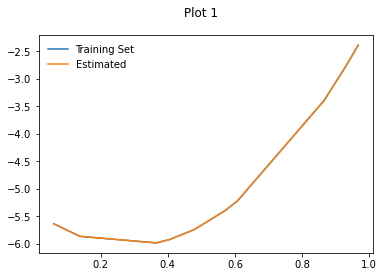

In [5]:
# Problem 9
deg_true = 5
N = 10
N_test = 1000

a = get_a(2)
x_train, y_train = draw_sample(2, a, N)

X = get_design_mat(x_train, deg_true)
b = least_square_estimator(X, y_train)

fig, ax = plt.subplots(1)
fig.suptitle('Plot 1')
ax.plot(x_train, y_train, label='Training Set')
ax.plot(x_train, np.matmul(X, b), label='Estimated')
plt.legend(loc="upper left", frameon=False)

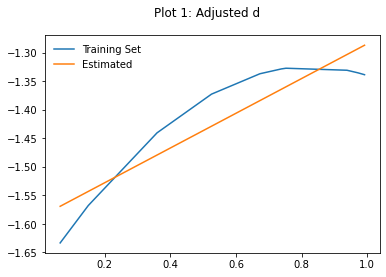

In [9]:
# Problem 10
deg_true = 1
N = 10
N_test = 1000

a = get_a(2)
x_train, y_train = draw_sample(2, a, N)

X = get_design_mat(x_train, deg_true)
b = least_square_estimator(X, y_train)

fig, ax = plt.subplots(1)
fig.suptitle('Plot 1: Adjusted d')
ax.plot(x_train, y_train, label='Training Set')
ax.plot(x_train, np.matmul(X, b), label='Estimated')
plt.legend(loc="upper left", frameon=False)

After adjusting d in the previous plot, the training set and the estimated curve perfectly fit at a minimal value of d=2. When d=0 and 1, the approximation error dominates. This follows the conclusion in problem 3 that the risk of $f_{H_2}$ is larger than or equal to that of $f_{H_d}$. When d gets to 0 or 1, there is no term to account for the $x^2$ term in the true distribution. Generally, approximation error relates to the chosen class of functions, and bigger F means smaller approximation error.

# In Presence of  Noise

**Problem 11**

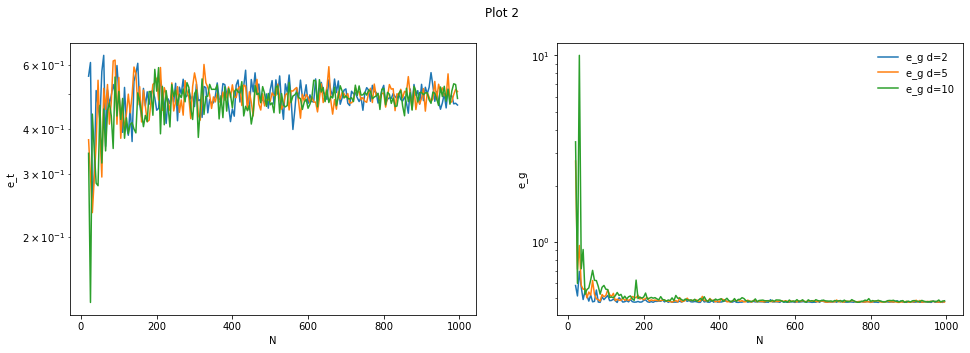

In [16]:
deg_true = [2, 5, 10]
N = range(20, 1000, 5)

et = []
eg = []
record_y = []
record_x = []
record_b = []
a = get_a(2)
x_test, y_test = draw_sample_with_noise(2, a, 1000)
for d in deg_true:
    tempt = []
    tempg = []
    for n in N:
        x_train, y_train = draw_sample_with_noise(2, a, n)
        X = get_design_mat(x_train, d)
        b = least_square_estimator(X, y_train)
        Rt = empirical_risk(X, b, y_train)
        
        # this part is to record some values of n for each value of d
        if n == 20 or n == 100:
            record_y.append(y_train)
            record_x.append(x_train)
            record_b.append(b)
        
        X = get_design_mat(x_test, d)
        Rg = empirical_risk(X, b, y_test)
        tempt.append(Rt)
        tempg.append(Rg)
    et.append(tempt)
    eg.append(tempg)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Plot 2')
ax[0].plot(N, et[0], label='e_t d=2')
ax[0].plot(N, et[1], label='e_t d=5')
ax[0].plot(N, et[2], label='e_t d=10')
ax[0].set_xlabel('N')
ax[0].set_ylabel('e_t')
ax[0].set_yscale('log')
ax[1].plot(N, eg[0], label='e_g d=2')
ax[1].plot(N, eg[1], label='e_g d=5')
ax[1].plot(N, eg[2], label='e_g d=10')
ax[1].set_xlabel('N')
ax[1].set_ylabel('e_g')
ax[1].set_yscale('log')
plt.legend(loc="upper right", frameon=False)

Text(0.5, 1.0, 'd=10, n=100')

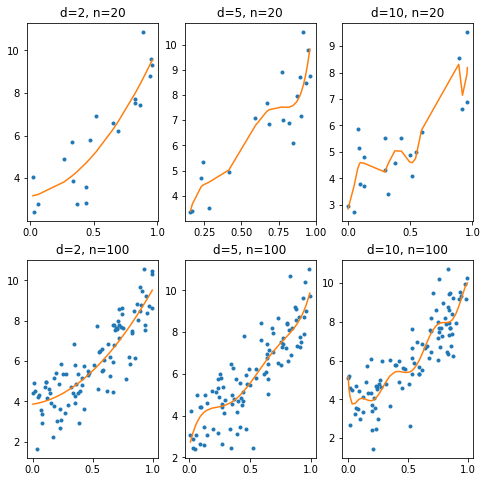

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(8,8))
d = [2, 2, 5, 5, 10, 10]

for i in range(len(record_x)):
    ax[i%2, i//2].plot(record_x[i], record_y[i], '.')
    Xb = np.matmul(get_design_mat(record_x[i], d[i]), record_b[i])
    ax[i%2, i//2].plot(record_x[i], Xb)
    
ax[0, 0].set_title('d=2, n=20')
ax[1, 0].set_title('d=2, n=100')
ax[0, 1].set_title('d=5, n=20')
ax[1, 1].set_title('d=5, n=100')
ax[0, 2].set_title('d=10, n=20')
ax[1, 2].set_title('d=10, n=100')

**Problem 12**

The estimation error of $\hat{f_n}$ in $F$ is defined as $R(\hat{f_n})-R(f_F)$

The emperical risk is defined as $\hat{R_n}(f)=\frac{1}{n}\sum_{i=1}^{n}l(f(x_i), y_i)$ and by the strong law of large numbers, if we have a large number of samples N, this formula is used to calculate the expected risk. Thus the estimation error can be rewritten as $\hat{R}(\hat{f_n})-\hat{R}(f_F)$. The $\hat{R}(\hat{f_n})$ is $e_g$ calculated in the previous problem, and the $f_F$ in this problem is assumed to be the polynomial function class we have chosen in the problem background.

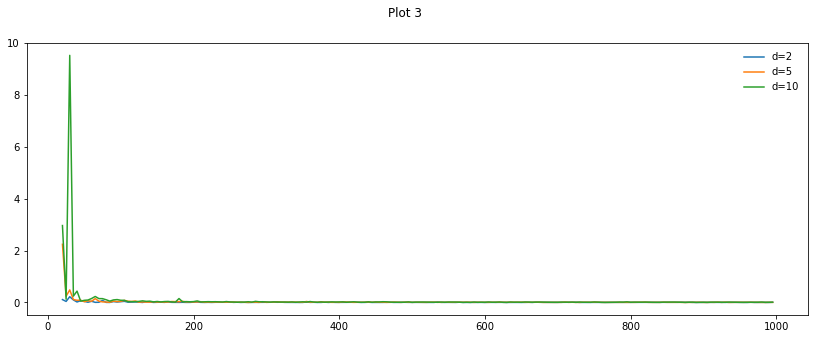

In [18]:
# empirical risk of f_F
RfF = 0
for i in range(len(x_test)):
    RfF += (a[0] + a[1] * x_test[i] + a[2] * (x_test[i] ** 2) - y_test[i]) ** 2
RfF = RfF / (2*N_test)

fig, ax = plt.subplots(1, figsize=(14, 5))
fig.suptitle('Plot 3')
ax.plot(N, [elem - RfF for elem in eg[0]], label='d=2')
ax.plot(N, [elem - RfF for elem in eg[1]], label='d=5')
ax.plot(N, [elem - RfF for elem in eg[2]], label='d=10')
plt.legend(loc="upper right", frameon=False)

**Problem 13**

From plot 2 and plot 3, the estimation error, as well as the generalization error, decreases and converges to a value close to 0 as N increases. The estimation error comes from the limited amount of samples we have. As N increases or gradually goes toward the direction of infinity, i.e. infinite amount of data, the estimation error will be 0. As d increases, the curve converges slower. Since if we have larger d, the complexity of the function increases, easier to overfit and thus we need more data for modeling. Generally, with smaller F which is smaller d value in this problem, we expect smaller estimation error.

**Problem 14**

The optimization error is defined as $R(\tilde{f_n})-R(\hat{f_n})$, with $\tilde{f_n}$ the function the optimization method returns and $\hat{f_n}$ the empirical risk minimizer. Since the algorithm we implement in this homework is in closed form, there is no optimization error.

**Problem 15**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ow = np.loadtxt('ozone_wind.data')
print('Number of instances in the data:', len(ow[:, 0]))

Number of instances in the data: 111


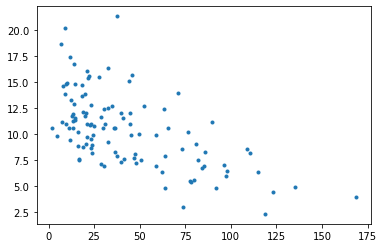

In [23]:
fig, ax = plt.subplots(1)
ax.plot(ow[:, 0], ow[:, 1], '.')

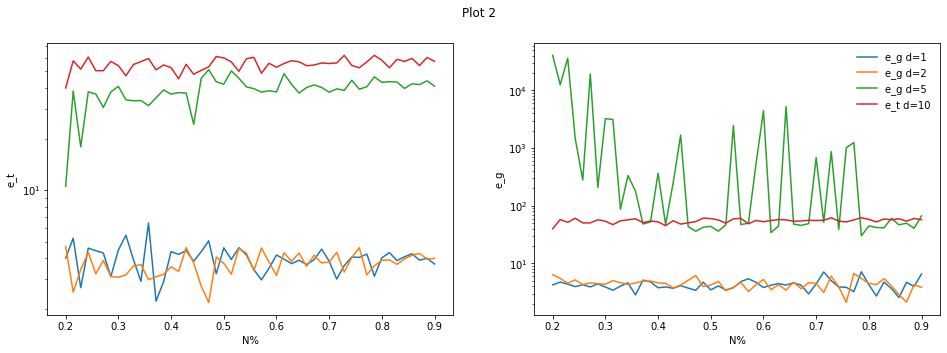

In [25]:
N_percent = np.linspace(0.2, 0.9, 50)
deg = [1, 2, 5, 10]
et = []
eg = []
record_y = []
record_x = []
record_b = []
for d in deg:
    tempt = []
    tempg = []
    for i in range(len(N_percent)):
        X_train, X_test, y_train, y_test = train_test_split(ow[:, 0], ow[:, 1], train_size=N_percent[i])
        X = get_design_mat(X_train, d)
        b = least_square_estimator(X, y_train)
        Rt = empirical_risk(X, b, y_train)
    
        X = get_design_mat(X_test, d)
        Rg = empirical_risk(X, b, y_test)
        tempt.append(Rt)
        tempg.append(Rg)
        
        # this part is to record some values of n for each value of d
        if N_percent[i] == 0.2 or N_percent[i] == 0.8:
            record_y.append(y_train)
            record_x.append(X_train)
            record_b.append(b)
    et.append(tempt)
    eg.append(tempg)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Plot 2')
ax[0].plot(N_percent, et[0], label='e_t d=1')
ax[0].plot(N_percent, et[1], label='e_t d=2')
ax[0].plot(N_percent, et[2], label='e_t d=5')
ax[0].plot(N_percent, et[3], label='e_t d=10')
ax[0].set_xlabel('N%')
ax[0].set_ylabel('e_t')
ax[0].set_yscale('log')
ax[1].plot(N_percent, eg[0], label='e_g d=1')
ax[1].plot(N_percent, eg[1], label='e_g d=2')
ax[1].plot(N_percent, eg[2], label='e_g d=5')
ax[1].plot(N_percent, et[3], label='e_t d=10')
ax[1].set_xlabel('N%')
ax[1].set_ylabel('e_g')
ax[1].set_yscale('log')
plt.legend(loc="upper right", frameon=False)

Initially, when the number of training sample is small, the value of training fluctuates a lot. After the number increases, the error converges to a specific value. Same trends appear for the generalization error. As d increases, the training error increases. Generally the generalization error has the same trend, but d=5 gives a fluctuate curve.

Text(0.5, 1.0, 'd=5, n~=80')

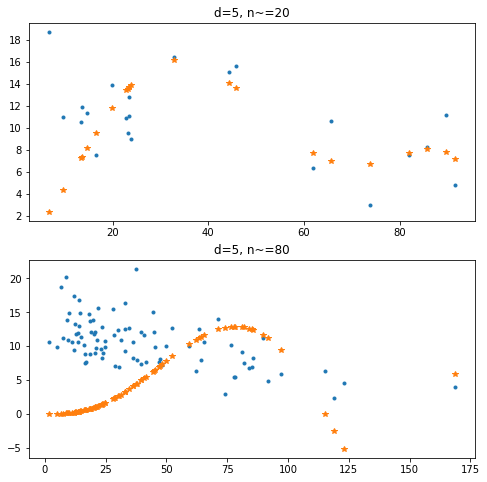

In [26]:
fig, ax = plt.subplots(2, figsize=(8,8))
d = 5
ax[0].plot(record_x[4], record_y[4], '.')
Xb = np.matmul(get_design_mat(record_x[4], d), record_b[4])
ax[0].plot(record_x[4], Xb, '*')

ax[1].plot(record_x[5], record_y[5], '.')
Xb = np.matmul(get_design_mat(record_x[5], d), record_b[5])
ax[1].plot(record_x[5], Xb, '*')
    
ax[0].set_title('d=5, n~=20')
ax[1].set_title('d=5, n~=80')

The data spread on the graph has different density on each section. Most of the data concentrates on the top left of the graph, while the bottom right only have a few points. This may lead to deficient data in some regions and thus cause generalization error to fluctuate.